In [1]:
#Import all functions 

from pygazeanalyser_functions import *

# Examples


### Read Data

In [2]:
"""
Reads Data from the asc file. Make sure the asc file is inside the folder 'Participant Data'

Change phase to switch between fixation, stimulus and reward phases

Example code below



"""


#participant details
partic_id = 'G036'
game_nr  = 4 #game number
phase = 'fixation'


data = read_data(partic_id, game_nr,phase)
#print(data) #Uncomment this line to print

#### Draw Heatmaps

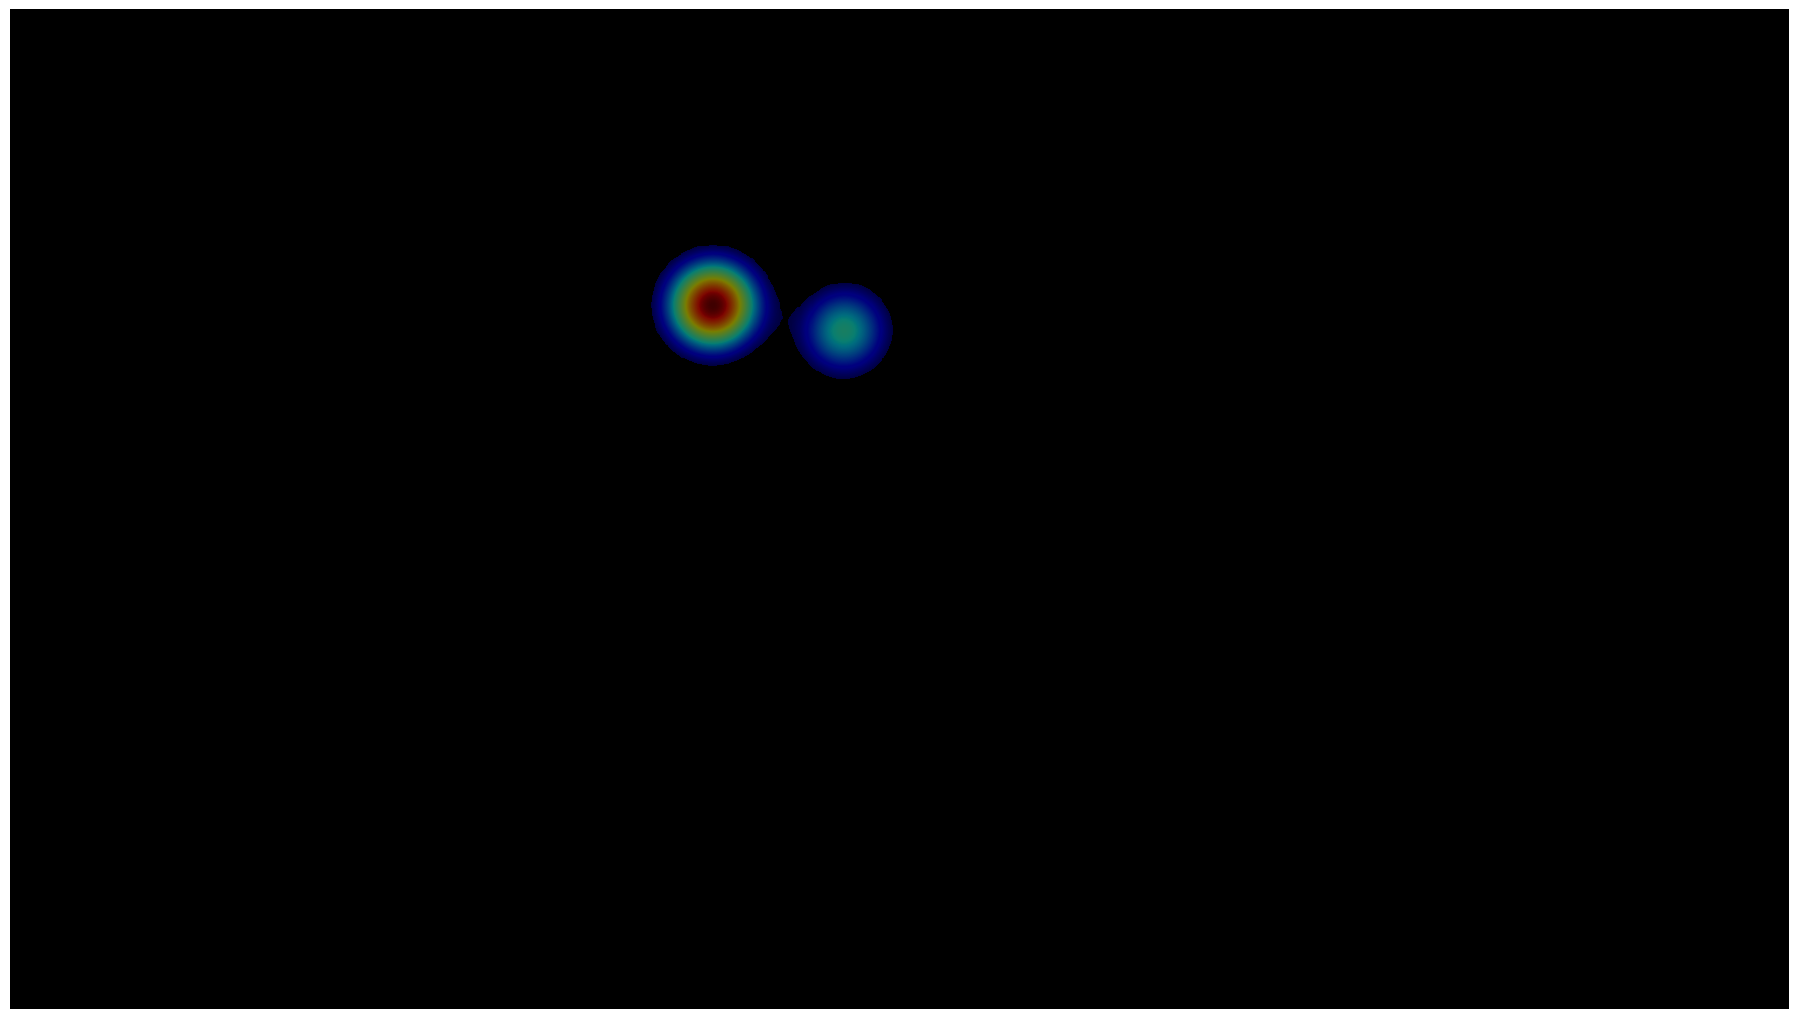

In [3]:
"""
Draws heatmaps, saccading path and saves it in the output_images folder

Required Inputs: data (loaded from the above cell)
                 trial_nr : trial number
                 partic_id, game_nr as per the previous cells

"""
trial_nr =3
draw_heatmap_trial(data,partic_id,game_nr,trial_nr)

### Get Centers and Radii

In [4]:
image_name = 'output_images\G036_game_4_3_20210506-172454_heatmap.png' # name of the image you want to load

centers,radii,image_out =return_centroid_heatmap(image_name)

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


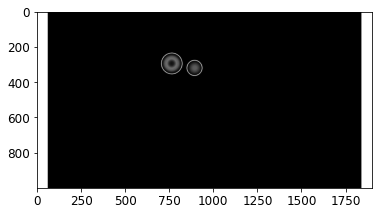

In [5]:
### See the output image to spot the circles
## The while outline is the radii

plt.imshow(image_out,cmap='gray')

In [6]:
radii

[43, 59]

### Velocity vs Noise

In [29]:

#participant details
partic_id = 'G036' #participant id
subject_id = 36    # id in number
game_nr  = 4 #game number
phase = 'stimulus' 
dataset_fname = 'dataset_0423.csv' 


data = read_data(partic_id, game_nr,phase)
data_properties =  load_dataset_properties(dataset_fname)
#print(data) #Uncomment this line to print

In [30]:
# Initialize the noise_sample_list
perc_noise_game_list =[]
trials = np.arange(1,17,1)
games  = np.arange(1,17,1)
prop_label = 'perc_noise_sample'
#load the list
for game_nr in games:
    perc_noise_trial_list = []
    for trial_nr in trials:
        perc_noise = return_property_value(data_properties, subject_id, game_nr, trial_nr,\
                                           prop_label)
        perc_noise_trial_list.append(perc_noise)
    perc_noise_game_list.append(perc_noise_trial_list)

In [13]:
#load velocity values
velocity_game_list =[]
phase = 'stimulus'
trials = np.arange(0,16,1)
games  = np.arange(1,17,1)
trial_success = []
for game_nr in games:
    velocity_trial_list = []
    data = read_data(partic_id, game_nr,phase)
    for trial_nr in trials:
        velocity_x,velocity_y = velocity_gaze(data,trial_nr)
        # mean velocity
        if velocity_x.size!=0:
            velocity_mean_x = np.mean(velocity_x)
            velocity_mean_y = np.mean(velocity_y)
        
        #append to trial list
        velocity_trial_list.append([velocity_mean_x,velocity_mean_y])
    velocity_game_list.append(velocity_trial_list)
velocity_game_list = np.array(velocity_game_list)

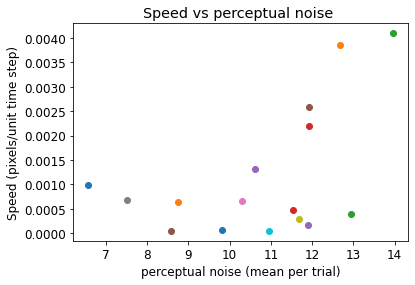

In [39]:
## Plots

#speed vs noise (speed = v_x**2 + v_y**2)
for i,game_nr in enumerate(games):
    
    #calculate speed
    vel_x_game_mean, vel_y_game_mean = (velocity_game_list[i].mean(0))[0],\
                                        (velocity_game_list[i].mean(0))[1]
    speed = vel_x_game_mean**2 + vel_y_game_mean**2

    # calculate average noise
    perc_noise_mean = np.array(perc_noise_game_list[i]).mean()
    if speed.size!=0:
        plt.scatter(perc_noise_mean,speed)
    

#labels and titles
plt.xlabel('perceptual noise (mean per trial)')
plt.ylabel('Speed (pixels/unit time step)')
plt.title('Speed vs perceptual noise ')
fig_title = 'speed_vs_perc_noise_participant_' + str(partic_id) 
plt.savefig(fig_title)

In [34]:
perc_noise_game_list

[[6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292,
  6.573747292],
 [6.573747292,
  7.100838778,
  18.76514325,
  5.192834462,
  23.69763446,
  7.222571848,
  22.80357896,
  5.671230478,
  22.22141681,
  19.98634282,
  5.875755582,
  6.389204834,
  21.24359383,
  4.543472476,
  6.364194497,
  19.26466533],
 [6.573747292,
  18.76514325,
  23.69763446,
  22.80357896,
  22.22141681,
  5.875755582,
  21.24359383,
  6.364194497,
  17.44983008,
  19.608321,
  19.4800401,
  6.016429306,
  6.159818083,
  15.12491037,
  6.803897205,
  5.004283272],
 [6.573747292,
  5.192834462,
  22.80357896,
  19.98634282,
  21.24359383,
  19.26466533,
  19.608321,
  5.585398043,
  6.159818083,
  16.82307248,
  5.004283272,
  17.72514542,
  6.367265732,
  6.946238757,
  5.610976168,
  5.756994154],
 [6.573747292,
  23.69763446,
  22.221416